# Importing Dependencies


In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Data Collection

In [2]:
insuranceData =  pd.read_csv('insurance.csv')
insuranceData.head()

# Columns

# age: age of primary beneficiary

# sex: insurance contractor gender, female, male

# bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
# objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

# children: Number of children covered by health insurance / Number of dependents

# smoker: Smoking

# region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

# charges: Individual medical costs billed by health insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Analysis

In [3]:
insuranceData.shape

(1338, 7)

In [4]:
insuranceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insuranceData.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

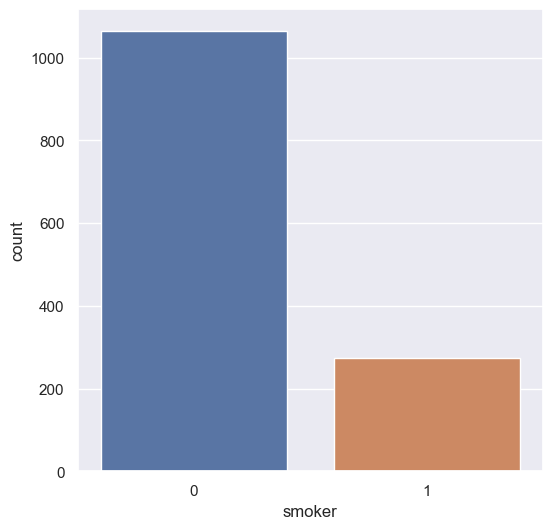

In [29]:
# to plot categorical data we use a countplot.

plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker', data = insuranceData)

In [9]:
insuranceData['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<Axes: xlabel='region', ylabel='count'>

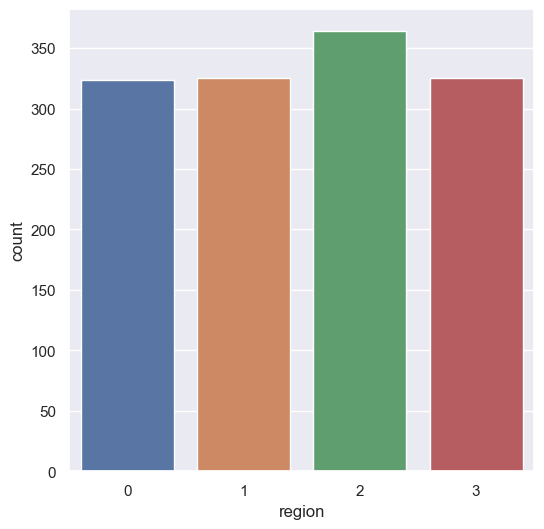

In [30]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'region', data = insuranceData)

In [10]:
insuranceData['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [5]:
insuranceData.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Here we see that we have 3 object columns and these columns cannot be processed by the model if we try to train them as it is
# Therefore, we need to perform Label Encoding on them to make it easier for the model to process the data and train the model
# the object columns are as follows
# 1. sex (0->F, 1->M)
# 2. smoker(0->no, 1->yes)
# 3. region(sw->3, se->2, nw->1, ne->0)

In [18]:
# Label Encoding
label_encoder = LabelEncoder()

insuranceData['sex'] = label_encoder.fit_transform(insuranceData['sex'])
insuranceData['smoker'] = label_encoder.fit_transform(insuranceData['smoker'])
insuranceData['region'] = label_encoder.fit_transform(insuranceData['region'])

In [19]:
insuranceData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


C:\Users\debar\AppData\Local\Temp\ipykernel_16156\2373634951.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insuranceData['age'])


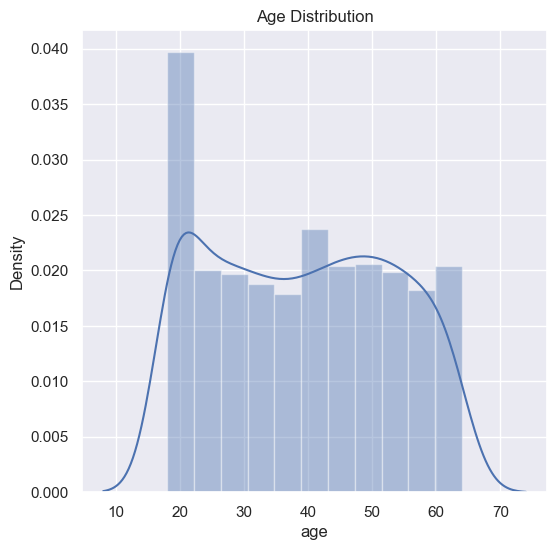

In [24]:
# finding the distribution of age or any numerical data we use distplot
# distplot stands for 'Distribution plot'

sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insuranceData['age'])
plt.title('Age Distribution')
plt.show()

C:\Users\debar\AppData\Local\Temp\ipykernel_16156\963162177.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insuranceData['sex'])


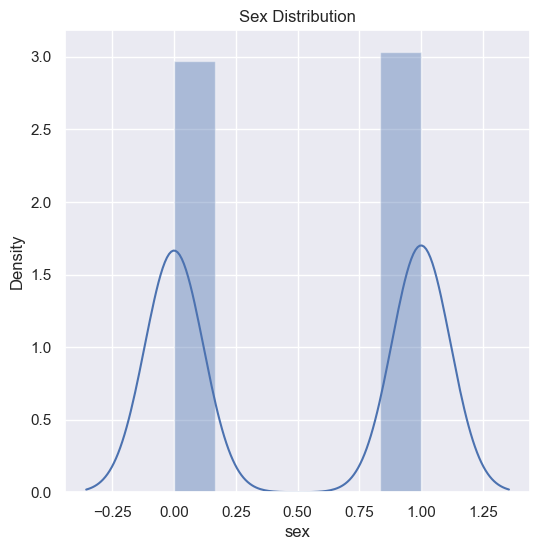

In [25]:
# finding the distribution of sex
# we are able to use distplot for a categorical data after we have converted it to a numerical form by doing label encoding

sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insuranceData['sex'])
plt.title('Sex Distribution')
plt.show()

In [28]:
insuranceData['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

C:\Users\debar\AppData\Local\Temp\ipykernel_16156\2405201498.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insuranceData['bmi'])


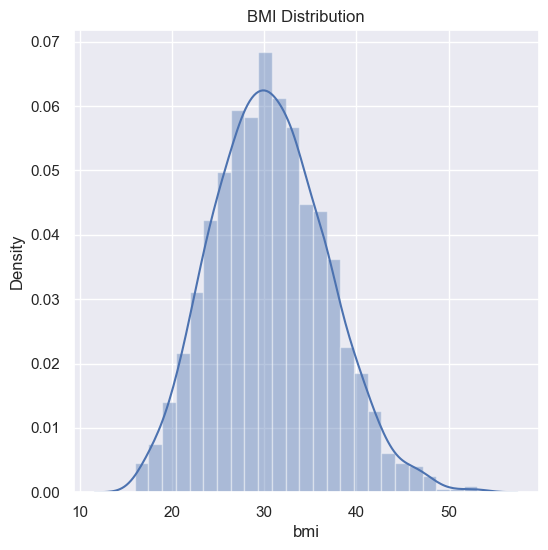

In [31]:
# Bmi distribution
plt.figure(figsize = (6,6))
sns.distplot(insuranceData['bmi'])
plt.title('BMI Distribution')
plt.show()

In [ ]:
# BMI of a normal person is between 18.5 to 24.5
# if over 25, person is considered over-weight
# if under 18, perdon is considered under- weight

<Axes: xlabel='children', ylabel='count'>

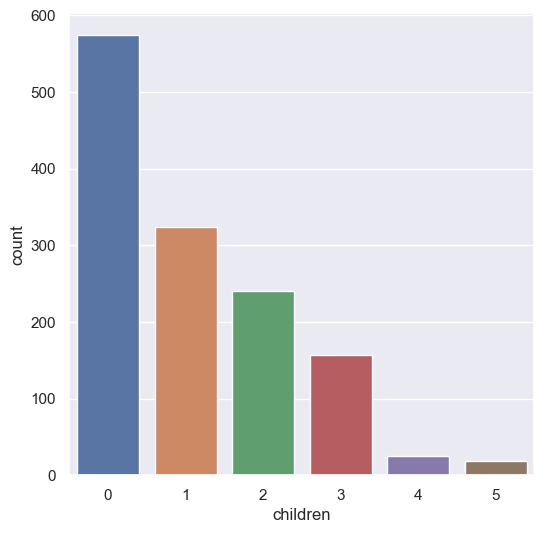

In [33]:
# children distribution ( can use both distplot and countplot for numerical data)

# plt.figure(figsize = (6,6))
# sns.distplot(insuranceData['children'])
# plt.title('Children Distribution')
# plt.show()

plt.figure(figsize = (6,6))
sns.countplot(x = 'children', data = insuranceData)

In [34]:
insuranceData['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

C:\Users\debar\AppData\Local\Temp\ipykernel_16156\3208703982.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insuranceData['charges'])


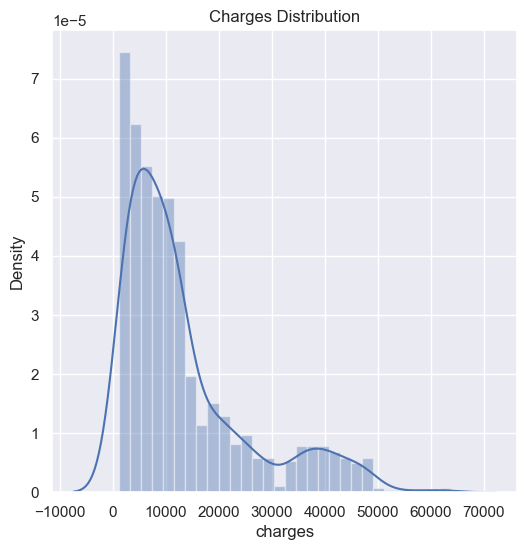

In [37]:
# distplot of charges
plt.figure(figsize = (6,6))
sns.distplot(insuranceData['charges'])
plt.title('Charges Distribution')
plt.show()

# Data Splitting and Training


In [39]:
# Splitting the data
X = insuranceData.drop(['charges'], axis = 1)
Y = insuranceData['charges']

print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [40]:
# splitting into X an Y , train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(1338, 6) (1070, 6) (268, 6)
(1338,) (1070,) (268,)


# Model Training 

In [41]:
# model loading
model = LinearRegression()

In [42]:
model.fit(X_train, Y_train)

LinearRegression()

In [43]:
# model evaluation
trainDataPrediction = model.predict(X_train)

In [45]:
r2_value = metrics.r2_score(Y_train, trainDataPrediction)
print(r2_value)

0.7475615631933097


In [46]:
testDataPrediction = model.predict(X_test)

In [48]:
r2_value = metrics.r2_score(Y_test, testDataPrediction)
print(r2_value)

0.7623224022563388


# Making a predictive system

In [51]:
inputData = (46,0,33.44,1,0,2)

# changing the inputData to a numpy array

inputDataArr =  np.asarray(inputData)

# reshape the numpy array as we are predicting for one instance
inputDataArrReshape = inputDataArr.reshape(1,-1)

prediction = model.predict(inputDataArrReshape)

print('The insurance cost in USD', prediction[0])

The insurance cost in USD 10945.911917040972


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
